# Threshold Image of Bear Glacier

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

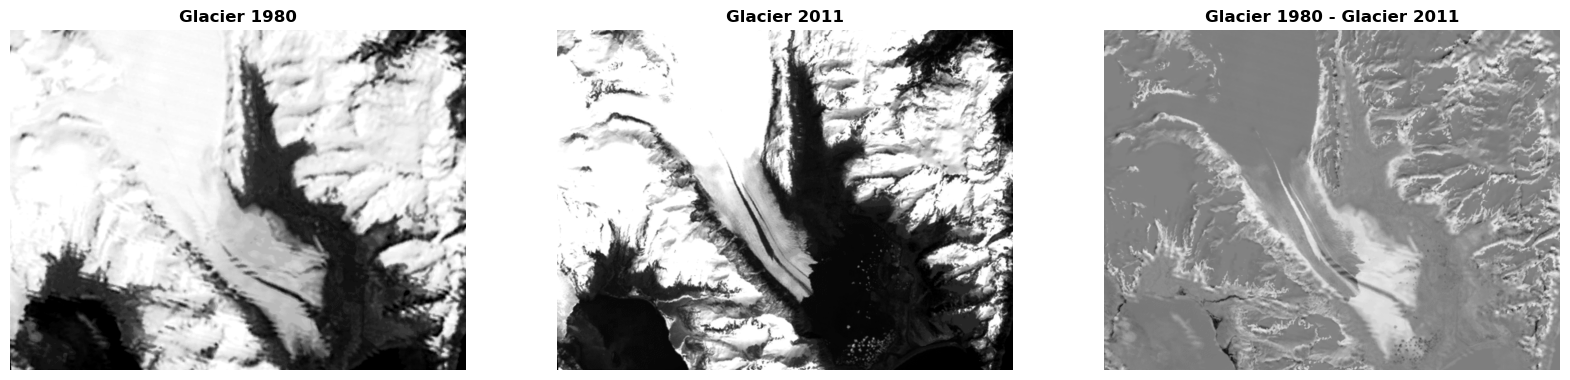

In [2]:
glacier_1980 = cv2.imread('./images/bearGlacier1980.png') # By default converts image to the 3 channel BGR color image
glacier_1980 = cv2.cvtColor(glacier_1980, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another

glacier_2011 = cv2.imread('./images/bearGlacier2011.png') # By default converts image to the 3 channel BGR color image
glacier_2011 = cv2.cvtColor(glacier_2011, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another

glacier_1980 = glacier_1980 / 255
glacier_2011 = glacier_2011 / 255
diff_ice = cv2.subtract(glacier_1980, glacier_2011)
diff_ice = (diff_ice - np.min(diff_ice)) / (np.max(diff_ice) - np.min(diff_ice)) # Scales values from 0 to 1

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(glacier_1980, cmap='gray')
axs[0].set_title('Glacier 1980')
axs[0].axis("off")
axs[1].imshow(glacier_2011, cmap='gray')
axs[1].set_title('Glacier 2011')
axs[1].axis("off")
axs[2].imshow(diff_ice, cmap='gray')
axs[2].set_title('Glacier 1980 - Glacier 2011')
axs[2].axis("off")
plt.show()

Bright regions of diffIce (e.g. areas that are close to white) represent places where there was more ice in 1980 than in 2011. This can be interpreted as lost ice over that time period.

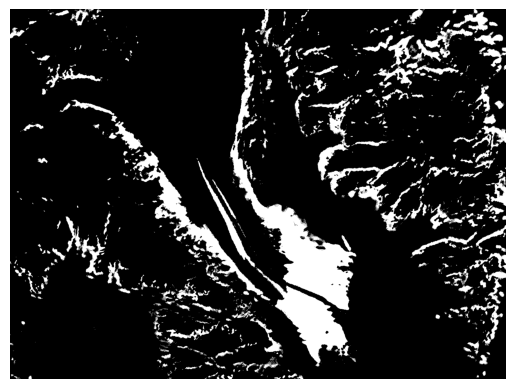

In [3]:
ice_1980 = diff_ice > 0.7
plt.imshow(ice_1980, cmap='gray')
plt.axis("off")
plt.show()

Dark regions of diffIce represent the ice gained between 1980 and 2011.

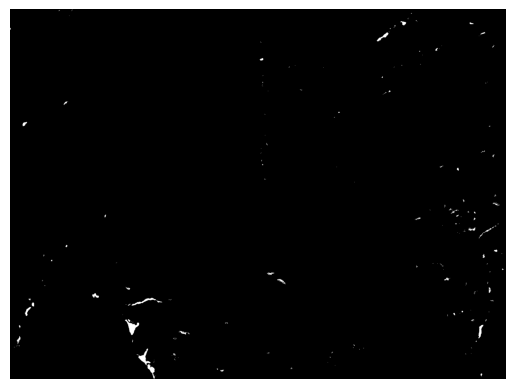

In [4]:
ice_2011 = diff_ice < 0.3
plt.imshow(ice_2011, cmap='gray')
plt.axis("off")
plt.show()

To calculate the percent of the image that lost ice, we can compare the number of white pixels in ice1980 to the total number of pixels in the image.

In [5]:
ice_amount_1980 = np.count_nonzero(ice_1980)
num_pixels = ice_1980.size
lost_ice = ice_amount_1980 / num_pixels * 100
print(f"Percent of lost ice: {lost_ice:.2f}%")

Percent of lost ice: 13.25%
